# Environment Setup / Package Installation
Details of dependencies included

Please note: due to the reinstallation of packages used when starting the Colab instance, you will need to restart the session after running this section.

In [1]:
!pip install -U  yellowbrick==1.3.post1

     |████████████████████████████████| 276kB 25.9MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [2]:
!pip install -U scikit-learn==0.24.1

     |████████████████████████████████| 22.3MB 5.6MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [3]:
import yellowbrick
import sklearn

print('The yellowbrick version is {}.'.format(yellowbrick.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The yellowbrick version is 1.3.post1.
The scikit-learn version is 0.24.1.


# Load Packages and Prepare Data
Sticking with (raw + binarized) diabetes dataset, and will add regression dataset after that.

Generic libraries will be loaded here, and overarching utilities will be defined in this section. Classes for individual implementations will be loaded as needed.

In [4]:
# Classic,data manipulation and linear algebra
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Yellowbrick classification visualizers 
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import DiscriminationThreshold

# Yellowbrick regression visualizers 
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import AlphaSelection
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.regressor import CooksDistance

# clustering visualizations 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# regression 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

import statsmodels.api as sm
from statsmodels.regression import linear_model

# sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data Loading and Preprocessing 

In [5]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


## Classification Data

In [6]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [7]:
# changing the missing values based on means for each class
diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Insulin'].isnull()), 'Insulin'] = 102.5
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Insulin'].isnull()), 'Insulin'] = 169.5

diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['Glucose'].isnull()), 'Glucose'] = 107
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['Glucose'].isnull()), 'Glucose'] = 140

diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['SkinThickness'].isnull()), 'SkinThickness'] = 27
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['SkinThickness'].isnull()), 'SkinThickness'] = 32

diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BloodPressure'].isnull()), 'BloodPressure'] = 70
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

diabetes_df.loc[(diabetes_df['Outcome'] == 0 ) & (diabetes_df['BMI'].isnull()), 'BMI'] = 30.1
diabetes_df.loc[(diabetes_df['Outcome'] == 1 ) & (diabetes_df['BMI'].isnull()), 'BMI'] = 34.3

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(diabetes_df, random_state=0, test_size=0.2)

train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

In [9]:
X_train = train.drop(columns=['Outcome'])
y_train = train['Outcome']

X_test = test.drop(columns=['Outcome'])
y_test = test['Outcome']

classes=['non-diabetic', 'diabetic']

## Regression Data

In [37]:
claims_data = pd.read_csv('insurance.csv')
claims_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [38]:
# One hot encoding for region
claims_data = pd.concat((claims_data,pd.get_dummies(claims_data.region, prefix='region')),1)
# One hot encoding for sex
claims_data = pd.concat((claims_data,pd.get_dummies(claims_data.sex, prefix='sex')),1)
# One hot encoding for smoker
claims_data = pd.concat((claims_data,pd.get_dummies(claims_data.smoker, prefix='smoker')),1)
# drop the columns 
claims_data.drop(['region', 'sex','smoker'], axis=1,inplace = True)
claims_data.head(10)

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,0,0,0,1,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,1,0
5,31,25.740,0,3756.62160,0,0,1,0,1,0,1,0
6,46,33.440,1,8240.58960,0,0,1,0,1,0,1,0
7,37,27.740,3,7281.50560,0,1,0,0,1,0,1,0
8,37,29.830,2,6406.41070,1,0,0,0,0,1,1,0
9,60,25.840,0,28923.13692,0,1,0,0,1,0,1,0


In [42]:
X_reg = claims_data.drop('charges', axis=1)
y_reg = claims_data['charges']

In [43]:
from sklearn.model_selection import train_test_split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = \
train_test_split(X_reg, y_reg, test_size=0.2,random_state = 0)

# New Section

# Classification Model Visualization

## Validation Curves

### Decision Tree Validation Curves

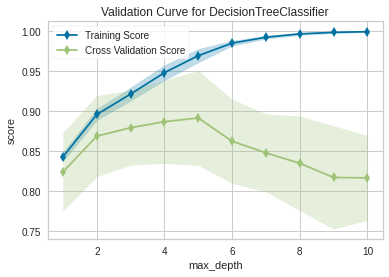

In [9]:
viz = ValidationCurve(
    DecisionTreeClassifier(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="roc_auc"
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
plt = viz.show()

### Logistic Regression Validation Curves

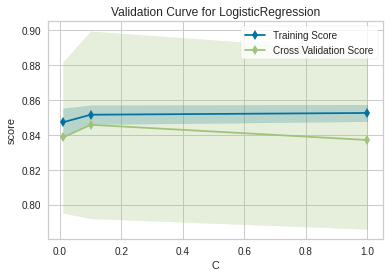

In [10]:
viz = ValidationCurve(
    LogisticRegression(), param_name="C",
    param_range=[0.01, 0.1, 1.0], cv=10, scoring="roc_auc"
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show()

### Gaussian Naive Bayes Validation Curves

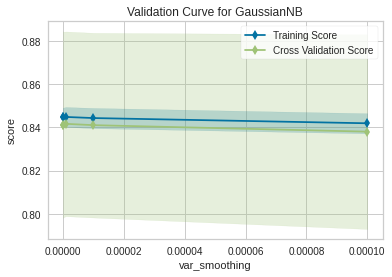

In [11]:
viz = ValidationCurve(
    GaussianNB(), param_name="var_smoothing",
    param_range=[1e-8, 1e-7, 1e-6, 1e-5, 1e-4], cv=10, scoring="roc_auc"
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show()

## Learning Curves

### Decision Tree Learning Curves

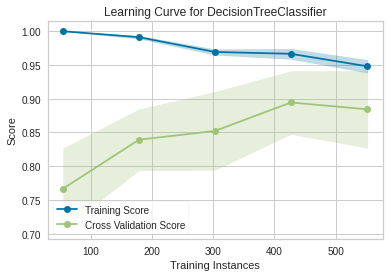

In [12]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), cv=10, scoring='roc_auc'
)

tree_viz= visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
tree_viz.show()

### Logistic Regression Learning Curves

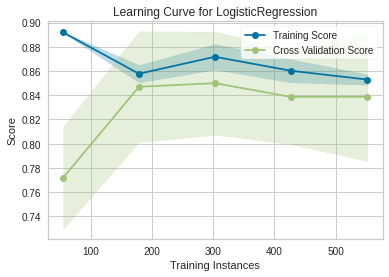

In [13]:
visualizer = LearningCurve(
    LogisticRegression(), cv=10, scoring='roc_auc')

lr_viz = visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
lr_viz.show()

### Gaussian Naive Bayes Learning Curves

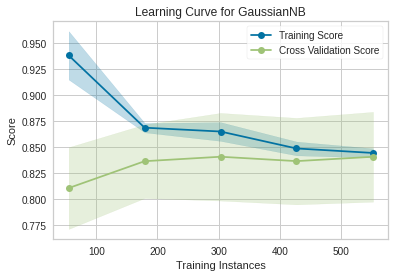

In [14]:
visualizer = LearningCurve(
    GaussianNB(), cv=10, scoring='roc_auc'
)

gb_viz = visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
gb_viz.show()

## Classification Results

### Decision Tree Classification Results

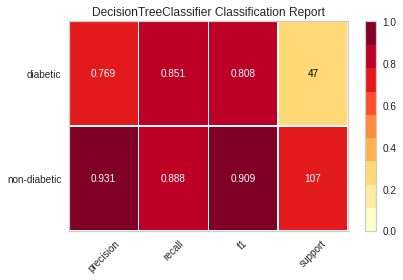

In [15]:
# Instantiate the classification model and visualizer
tree = DecisionTreeClassifier(max_depth=4)
visualizer = ClassificationReport(tree, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

### Logistic Regression Classification Results

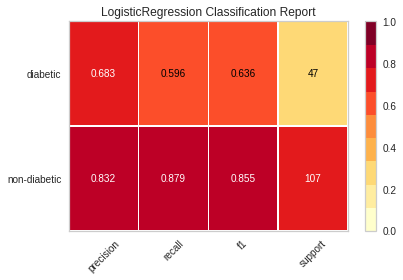

In [16]:
# Instantiate the classification model and visualizer
lr = LogisticRegression()
visualizer = ClassificationReport(lr, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


### Gaussian Naive Bayes Classification Results

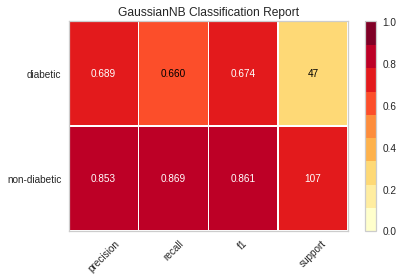

In [17]:
# Instantiate the classification model and visualizer
gaussian_nb = GaussianNB()
visualizer = ClassificationReport(gaussian_nb, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure


##Confusion Matrices

### Decision Tree Confusion Matrix

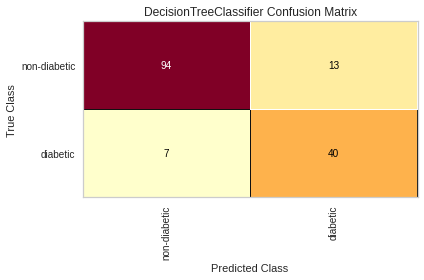

In [19]:
tree = DecisionTreeClassifier(max_depth=4)

cm = ConfusionMatrix(
    tree, classes=classes
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

### Logistic Regression Confusion Matrix

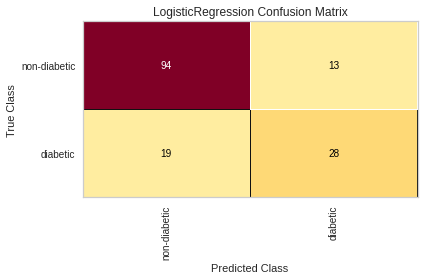

In [20]:
lr = LogisticRegression()

cm = ConfusionMatrix(
    lr, classes=classes
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

### Gaussian Naive Bayes Confusion Matrix

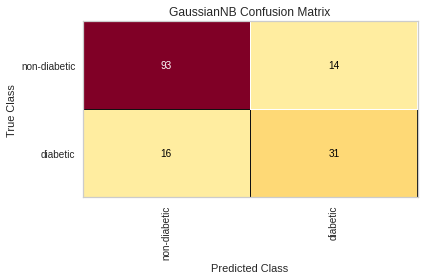

In [21]:
gb = GaussianNB()

cm = ConfusionMatrix(
    gb, classes=classes
)

cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show()

## ROC Curves

### Decision Tree ROC Curves

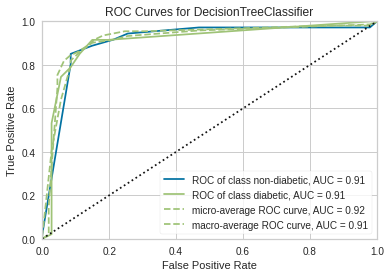

In [22]:
# Instantiate the visualizer with the classification model
tree = DecisionTreeClassifier(max_depth=4)
visualizer = ROCAUC(tree, classes=classes)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

### Logistic Regression ROC Curves

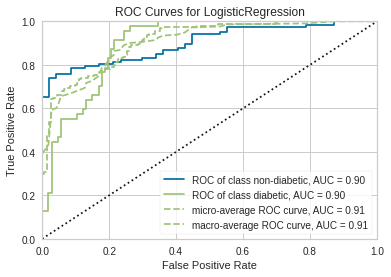

In [23]:
# Instantiate the visualizer with the classification model
lr = LogisticRegression()
visualizer = ROCAUC(lr, classes=classes)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

### Gaussian Naive Bayes ROC Curves

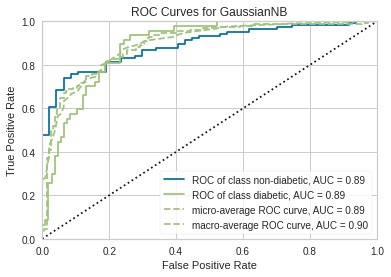

In [24]:
# Instantiate the visualizer with the classification model
gb = GaussianNB()
visualizer = ROCAUC(gb, classes=classes)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show() 

## PRC Curves

### Decision Tree PRC Curves

```
# This is formatted as code
```



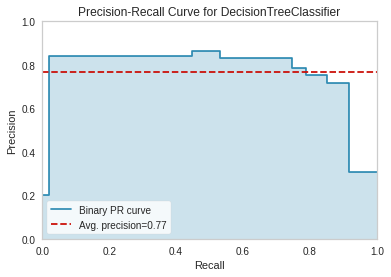

In [25]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(DecisionTreeClassifier(max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

### Logistic Regression PRC Curve

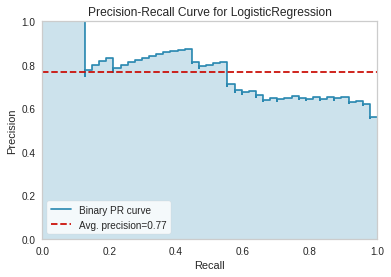

In [26]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(LogisticRegression())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

### Gaussian Naive Bayes PRC Curve

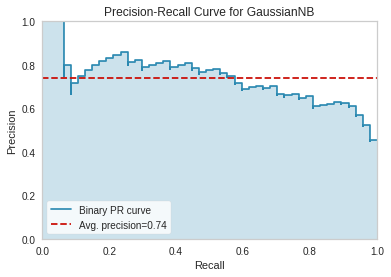

In [27]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(GaussianNB())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

## Discrimination Threshold Plots

### Decision Tree

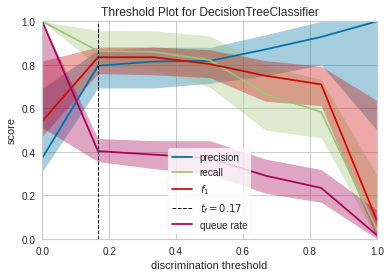

In [29]:
tree = DecisionTreeClassifier(max_depth=4)
visualizer = DiscriminationThreshold(tree)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

### Logistic Regression

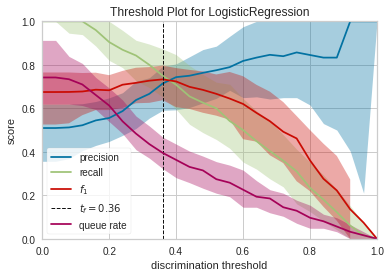

In [30]:
# Instantiate the classification model and visualizer
lr = LogisticRegression()
visualizer = DiscriminationThreshold(lr)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

### Gaussian Naive Bayes 

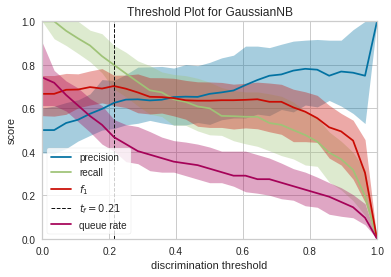

In [31]:
nb = GaussianNB()
visualizer = DiscriminationThreshold(nb)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Regression Model Visualization

## Prediction Plots

### Linear Regression Prediction Plots


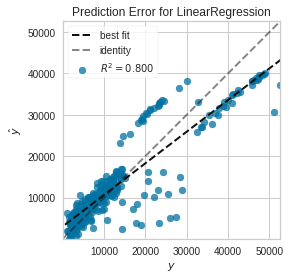

In [49]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_reg_train, y_reg_train)  # Fit the training data to the visualizer
visualizer.score(X_reg_test, y_reg_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


## Residual Plots 

### Linear Regression Residual Plots

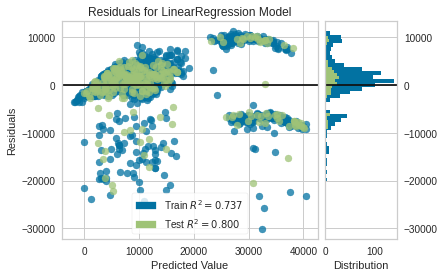

In [52]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_reg_train, y_reg_train)  # Fit the training data to the visualizer
visualizer.score(X_reg_test, y_reg_test)  # Evaluate the model on the test data
visualizer.show()

## Alpha Selection Plots

### Lasso Regression Alpha Selection Plots

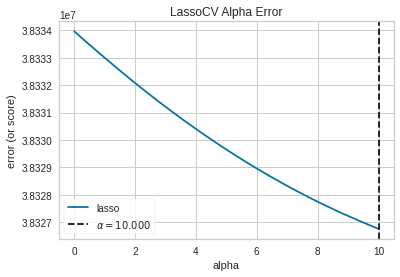

In [55]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_reg_train, y_reg_train)
visualizer.show()

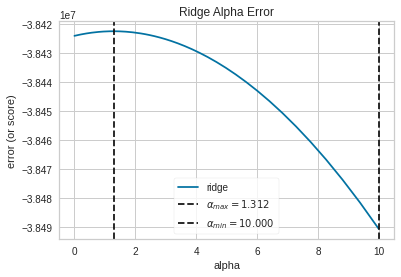

In [56]:
# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 1, 400)

# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alphas,
    cv=10,
    scoring="neg_mean_squared_error"
)

visualizer.fit(X_reg_train, y_reg_train)
visualizer.show()

## Cook's Distance Plots

### Visualizing training instances with Cook's Distance

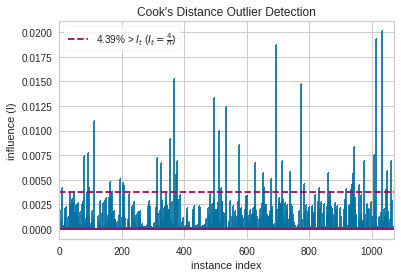

In [57]:
# Instantiate and fit the visualizer
visualizer = CooksDistance()
visualizer.fit(X_reg_train, y_reg_train)
visualizer.show()

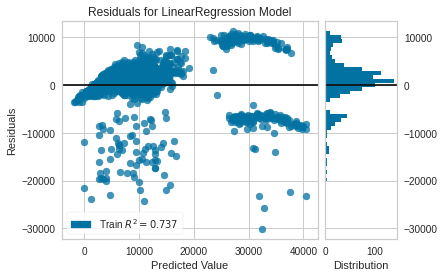

In [58]:
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_train, y_train)
visualizer_residuals.show()

### Linear Regression with entire Training Data

In [59]:
X_train_statsmodels = X_reg_train[['age', 'bmi', 'children','region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes']]



sm_ols = linear_model.OLS(y_reg_train.values, X_train_statsmodels) 
sm_model_original = sm_ols.fit()
sm_model_original.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          1.85e-301
Time:                        16:04:43   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                253.7005     13.530     18.751      0.000     227.152     280.249
bmi                335.9628     32.228     10.424      0.000     272.724     399.201
children           436.9101    156.584      2.790      0.005     129.661     744.159
region_northeast   380.4127    384.691      0.989      0.323    -374.430    1135.255
region_northwest   120.2800    376.809      0.319      0.750    -619.096     859.656
region_southeast  -532.8661    436.403     -1.221      0.222   -1389.177     323.445
region_southwest  -381.5360    391.071     -0.976      0.329   -1148.897     385.825
sex_female        -199.1229    471.328     -0.422      0.673   -1123.964     725.718
sex_male          -214.5866    477.395     -0.449      0.653   -1151.332     722.159
smoker_no        -1.201e+04    478.235    -25.112      0.000   -1.29e+04   -1.11e+04
smoker_yes         1.16e+04    510.457     22.716      0.000    1.06e+04    1.26e+04
==============================================================================
Omnibus:                      256.825   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.044
Skew:                           1.279   Prob(JB):                    2.29e-135
Kurtosis:                       5.715   Cond. No.                     4.39e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.46e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Removing Less Influential data through Cook's distance

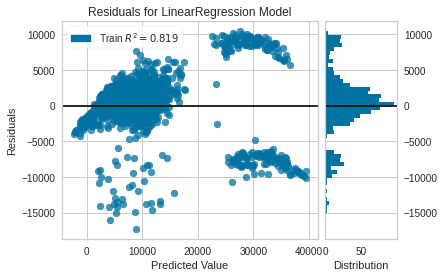

In [60]:
i_less_influential = (visualizer.distance_ <= visualizer.influence_threshold_)
X_li, y_li = X_reg_train[i_less_influential], y_reg_train[i_less_influential]

model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li, y_li)
visualizer_residuals.show()

### Linear Regression after removing influential

In [61]:
X_train_statsmodels_improved = X_li[['age', 'bmi', 'children','region_northeast',
       'region_northwest', 'region_southeast', 'region_southwest',
       'sex_female', 'sex_male', 'smoker_no', 'smoker_yes']]
sm_ols = linear_model.OLS(y_li.values, X_train_statsmodels_improved) 
sm_model = sm_ols.fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     574.6
Date:                Wed, 14 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:09:03   Log-Likelihood:                -10121.
No. Observations:                1023   AIC:                         2.026e+04
Df Residuals:                    1014   BIC:                         2.030e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                248.1334     10.815     22.944      0.000     226.912     269.355
bmi                322.2429     26.019     12.385      0.000     271.186     373.299
children           387.6288    125.355      3.092      0.002     141.645     633.613
region_northeast   292.7949    306.909      0.954      0.340    -309.454     895.044
region_northwest  -206.3696    301.218     -0.685      0.493    -797.452     384.712
region_southeast  -564.3746    350.623     -1.610      0.108   -1252.403     123.654
region_southwest    -5.2385    313.322     -0.017      0.987    -620.072     609.596
sex_female        -364.4913    377.119     -0.967      0.334   -1104.514     375.531
sex_male          -118.6965    383.817     -0.309      0.757    -871.864     634.471
smoker_no        -1.207e+04    386.202    -31.255      0.000   -1.28e+04   -1.13e+04
smoker_yes        1.159e+04    407.239     28.454      0.000    1.08e+04    1.24e+04
==============================================================================
Omnibus:                       51.851   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.740
Skew:                           0.481   Prob(JB):                     3.22e-15
Kurtosis:                       3.801   Cond. No.                     5.90e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.68e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Clustering Visualizations

## Elbow Method Distortion Score

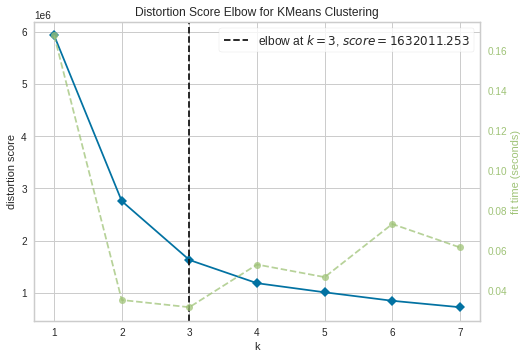

In [11]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,8))

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Elbow Method Calinski Harabasz

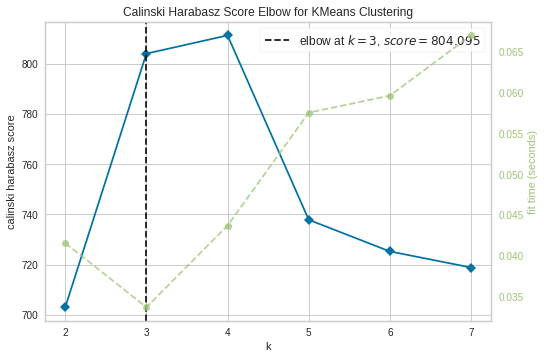

In [13]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,8), metric='calinski_harabasz'
)

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


## Silhouette Visualizer

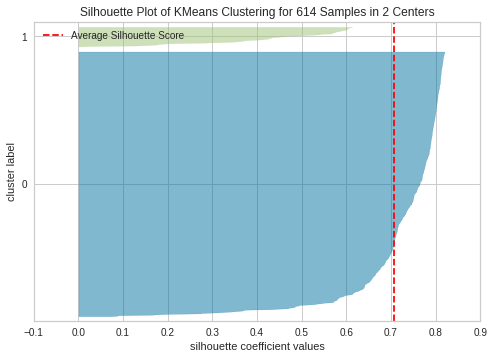

In [15]:
# Instantiate the clustering model and visualizer
model = KMeans(2, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

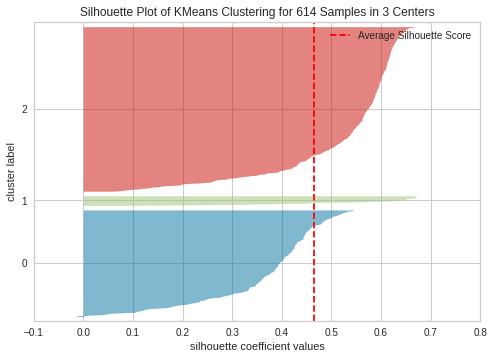

In [16]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show() 

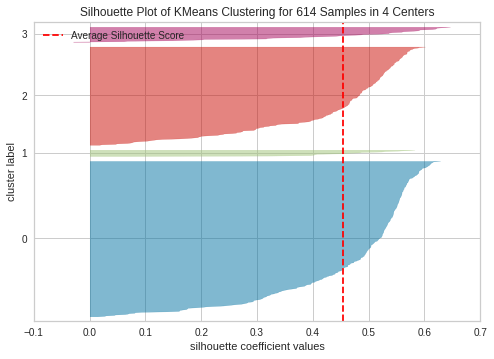

In [17]:
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show() 

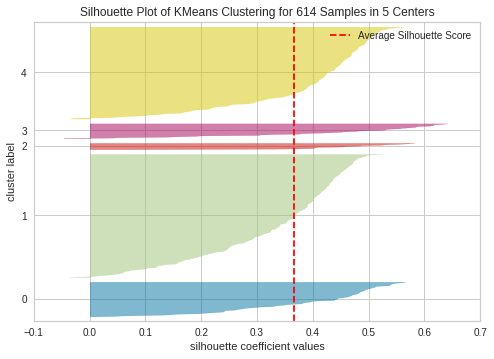

In [18]:
model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show() 